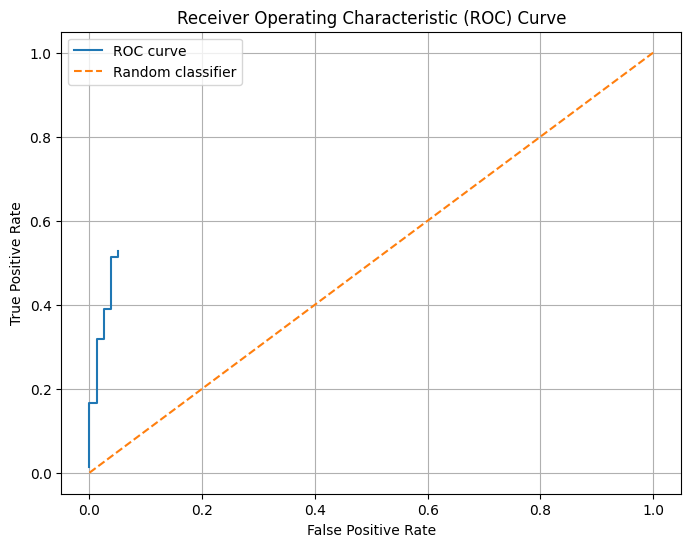

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/roc_dataaryan.csv')

# Sort the dataframe by Prediction in descending order
df_sorted = df.sort_values('Prediction', ascending=False)

# Calculate cumulative TP and FP
df_sorted['TP_cumsum'] = df_sorted['TP'].cumsum()
df_sorted['FP_cumsum'] = df_sorted['FP'].cumsum()

# Calculate TPR and FPR
total_positives = df_sorted['True_Label'].sum()
total_negatives = len(df_sorted) - total_positives
df_sorted['TPR'] = df_sorted['TP_cumsum'] / total_positives
df_sorted['FPR'] = df_sorted['FP_cumsum'] / total_negatives

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['FPR'], df_sorted['TPR'], label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
